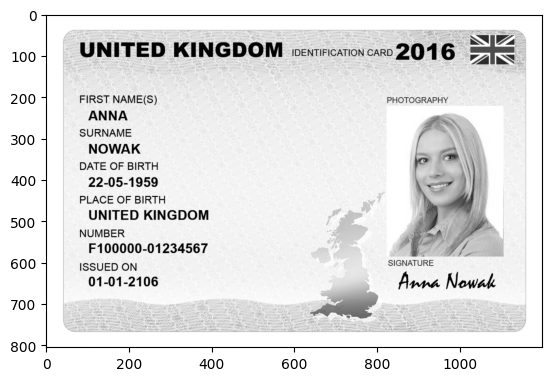

In [123]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

dir = '..\\Datasets\\CV Images\\'
img = cv2.imread(dir + 'ID_card.png', 0)

plt.imshow(img, 'gray')

(<Axes: title={'center': 'OCR-Ready'}>,
 Text(0.5, 1.0, 'OCR-Ready'))

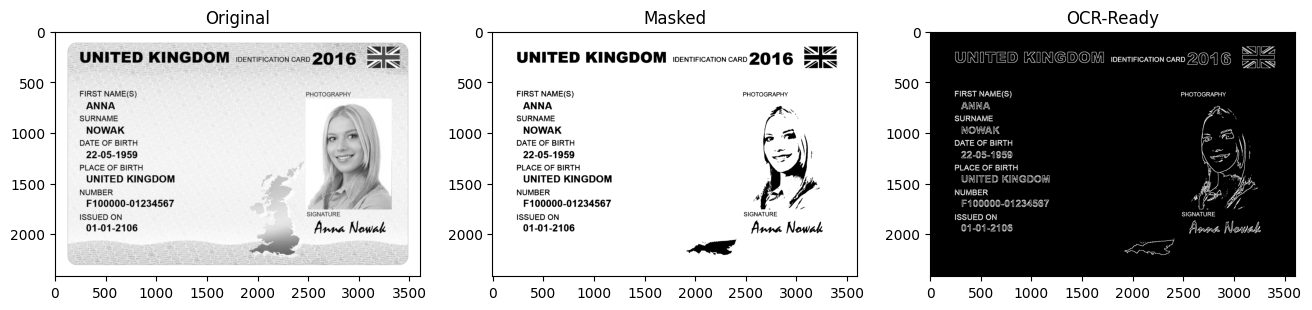

In [124]:
# Resizing
h = img.shape[0]
w = img.shape[1]
resized = cv2.resize(img, (w*3, h*3), interpolation=cv2.INTER_BITS)

# Thresholding
ret, th = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Edge detection
edges = cv2.Laplacian(th, -1, ksize=9)

plt.figure(figsize=(16, 12))
plt.subplot(131), plt.imshow(resized, 'gray'), plt.title('Original')
plt.subplot(132), plt.imshow(th, 'gray'), plt.title('Masked')
plt.subplot(133), plt.imshow(edges, 'gray'), plt.title('OCR-Ready')

In [125]:
text = pytesseract.image_to_string(th)
print(text)

UNITED KINGDOM IDENTIFICATION CARD @Q4G ——

FIRST NAME(S)
ANNA

SURNAME
NOWAK

DATE OF BIRTH
22-05-1959

PLACE OF BIRTH
UNITED KINGDOM

NUMBER
F100000-01234567

ISSUED ON
01-01-2106

PHOTOGRAPHY

\

SIGNATURE

Anna New



In [126]:
import re
import pandas as pd

# regex expressions patters for each data value
patterns = {
    "First Name": r"FIRST NAME\(S\)\n*([A-Za-z]+)",
    "Surname": r"SURNAME\n*([A-Za-z]+)",
    "Date of Birth": r"DATE OF BIRTH\n*([\d-]+)",
    "Place of Birth": r"PLACE OF BIRTH\s*([\s\S]+?)(?=\n|$)",
    "Number": r"NUMBER\n*([\w-]+)",
    "Issued On": r"ISSUED ON\n*([\d-]+)",
}

# Extract information using regular expressions
extracted_data = {}
for key, pattern in patterns.items():
    match = re.search(pattern, text)
    extracted_data[key] = match.group(1) if match else None

# Add Full Name to the extracted data
extracted_data["Full Name"] = extracted_data['First Name'] + ' ' + extracted_data['Surname']

# Remove 'First Name' and 'Surname' from the extracted data
extracted_data.pop('First Name', None)
extracted_data.pop('Surname', None)

df = pd.DataFrame([extracted_data])
df = df[['Full Name'] + [col for col in df.columns if col != 'Full Name']]

df

,Full Name,Date of Birth,Place of Birth,Number,Issued On
0,ANNA NOWAK,22-05-1959,UNITED KINGDOM,F100000-01234567,01-01-2106
